In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

from statsmodels.tsa.seasonal import seasonal_decompose

# dickey fuller test for stationarity check
from statsmodels.tsa.stattools import adfuller,acf,pacf

from statsmodels.tsa.statespace.tools import diff
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf


from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [ ]:
import gzip

def parse(path):
  g = gzip.open(path, 'rb')
  for l in g:
    yield eval(l)

def getDF(path):
  i = 0
  df = {}
  for d in parse(path):
    df[i] = d
    i += 1
  return pd.DataFrame.from_dict(df, orient='index')

In [ ]:
df1=getDF("/content/drive/MyDrive/capstone_data/meta_Digital_Music.json.gz")
df1

,asin,title,price,imUrl,related,salesRank,categories,description,brand
0,5555991584,Memory of Trees,9.49,http://ecx.images-amazon.com/images/I/51b5WDjd...,"{'also_bought': ['B000002LRT', 'B000002LRR', '...",{'Music': 939190},"[[CDs & Vinyl, New Age, Celtic New Age], [CDs ...",NaN,NaN
1,6308051551,Don't Drink His Blood,8.91,http://ecx.images-amazon.com/images/I/31LT2n7Q...,NaN,NaN,"[[Digital Music, Alternative Rock, Indie & Lo-...",NEW Combo BLUWAVS CD and FLAC FILE,NaN
2,7901622466,On Fire,11.33,http://ecx.images-amazon.com/images/I/21W29WZw...,"{'also_bought': ['B00000282A', 'B0084O8O9S', '...",{'Music': 58799},"[[CDs & Vinyl, Christian, Rock & Alternative],...",NaN,NaN
3,B0000000ZW,Changing Faces,23.64,http://ecx.images-amazon.com/images/I/51H3Bp-3...,"{'also_bought': ['B00000010Z', 'B0000039Q5', '...",{'Music': 68784},"[[CDs & Vinyl, Dance & Electronic], [CDs & Vin...",,
4,B00000016W,Pet Sounds,9.49,http://ecx.images-amazon.com/images/I/51pDGkXj...,"{'also_bought': ['B0025KVLTM', 'B00007FOMP', '...",{'Music': 77205},"[[CDs & Vinyl, Classic Rock], [CDs & Vinyl, Po...",NaN,NaN
...,...,...,...,...,...,...,...,...,...
279894,B00LPQOYIW,NaN,NaN,http://ecx.images-amazon.com/images/I/51qeT9Z7...,NaN,NaN,[[Digital Music]],NaN,NaN
279895,B00LTL4VGI,NaN,NaN,http://ecx.images-amazon.com/images/I/51NL8e7H...,NaN,NaN,[[Digital Music]],NaN,NaN
279896,B00LTFDZXE,NaN,NaN,http://ecx.images-amazon.com/images/I/61fkAKY8...,"{'also_bought': ['B00LWIJXH0', 'B00LC0HC62', '...",NaN,[[Digital Music]],NaN,NaN
279897,B00LWJDZHI,NaN,1.29,http://ecx.images-amazon.com/images/I/61THoSjo...,"{'also_bought': ['B00LWJDXTI', 'B00L0QWBF0', '...",NaN,[[Digital Music]],NaN,NaN


In [ ]:
df=getDF("/content/drive/MyDrive/capstone_data/reviews_Digital_Music.json.gz")
df

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2EFCYXHNK06IS,5555991584,"Abigail Perkins ""Abby &#34;Reads Too Much&#34...","[4, 5]",The anthemic title track begins &quot;The Memo...,5.0,Enya Experiments And Succeeds,978480000,"01 3, 2001"
1,A1WR23ER5HMAA9,5555991584,AKB,"[1, 1]",Just when I thought Enya couldn't possibly get...,5.0,How to improve upon perfection.,953424000,"03 19, 2000"
2,A2IR4Q0GPAFJKW,5555991584,Alexander,"[0, 0]",Nice CD for easy listening. My husband and I ...,4.0,Good listening.,1393545600,"02 28, 2014"
3,A2V0KUVAB9HSYO,5555991584,Alison Hight,"[0, 1]","I really liked this CD, especially the differe...",4.0,Loved It,966124800,"08 13, 2000"
4,A1J0GL9HCA7ELW,5555991584,"Al the Pal ""Al the Pal""","[3, 3]",Enya's richly chorded style has smitten me onc...,5.0,Another Hauntingly Beautiful Collection of Songs,1007683200,"12 7, 2001"
...,...,...,...,...,...,...,...,...,...
836001,A38NRGVVEF3950,B00LWJDZHI,gia r.,"[0, 0]",Amazing song from a amazing girl,5.0,Five Stars,1405641600,"07 18, 2014"
836002,A36ZEAXJ5HMQXA,B00LWJDZHI,Jenira,"[0, 0]",I Love it!!!BBN1334,5.0,Love it!!,1406073600,"07 23, 2014"
836003,A1840L5R4OPDE4,B00LWJDZHI,leo,"[0, 0]",Love it!!! I can see she is working hard to ge...,5.0,Chiquis Rivera &#128077;&#128077;,1405900800,"07 21, 2014"
836004,A1HGHLLGGGAQZX,B00LWJDZHI,Selene murillo,"[0, 0]",Love the song,5.0,Five Stars,1405814400,"07 20, 2014"


In [ ]:
df.drop_duplicates(subset="asin",inplace=True)

In [ ]:
df.loc[df['overall']<3,'Sentiment'] = 0  
df.loc[df['overall']==3,'Sentiment'] = 1
df.loc[df['overall']>3,'Sentiment'] = 2 

In [ ]:
def f(row):
    
    '''This function returns sentiment value based on the overall ratings from the user'''
    
    if row['overall'] == 3.0:
        val = 'Neutral'
    elif row['overall'] == 1.0 or row['overall'] == 2.0:
        val = 'Negative'
    elif row['overall'] == 4.0 or row['overall'] == 5.0:
        val = 'Positive'
    else:
        val = -1
    return val

In [ ]:
#Applying the function in our new column
df['sentiment1'] = df.apply(f, axis=1)

In [ ]:
new = df["reviewTime"].str.split(",", n = 1, expand = True)
df["date"]= new[0]
df["year"]= new[1]
df=df.drop(['reviewTime'], axis=1)
new1 = df["date"].str.split(" ", n = 1, expand = True) 
df["month"]= new1[0]
df["day"]= new1[1]
df=df.drop(['date'], axis=1)
cols=["year","month","day"]
df['date'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

In [ ]:
df['date'] = pd.to_datetime(df['date'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 266414 entries, 0 to 835999
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   reviewerID      266414 non-null  object        
 1   asin            266414 non-null  object        
 2   reviewerName    265512 non-null  object        
 3   helpful         266414 non-null  object        
 4   reviewText      266414 non-null  object        
 5   overall         266414 non-null  float64       
 6   summary         266414 non-null  object        
 7   unixReviewTime  266414 non-null  int64         
 8   Sentiment       266414 non-null  float64       
 9   sentiment1      266414 non-null  object        
 10  year            266414 non-null  object        
 11  month           266414 non-null  object        
 12  day             266414 non-null  object        
 13  date            266414 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), in

In [ ]:
df_digital_music=df[["date","Sentiment"]]

In [ ]:
df_digital_music.head()

,date,Sentiment
0,2001-01-03,2.0
130,2004-02-27,2.0
132,2014-01-27,2.0
149,2005-01-28,2.0
170,2012-11-13,2.0


In [ ]:
df_digital_music.Sentiment.value_counts()

2.0    243835
0.0     12085
1.0     10494
Name: Sentiment, dtype: int64

In [ ]:
ts_pos=df_digital_music[(df_digital_music.Sentiment==2)]    ### positive
ts_neu=df_digital_music[(df_digital_music.Sentiment==0)]    ### neutral
ts_neg=df_digital_music[(df_digital_music.Sentiment==1)]    ### negative

In [ ]:
ts_pos=ts_pos.groupby(["date"])[["Sentiment"]].count()
ts_neu=ts_neu.groupby(["date"])[["Sentiment"]].count()
ts_neg=ts_neg.groupby(["date"])[["Sentiment"]].count()

In [ ]:
### 1).positive sentiments:-

In [ ]:
ts_pos.head()

,Sentiment
date,
1998-02-09,1
1998-05-01,1
1998-05-11,1
1998-05-29,1
1998-06-11,1


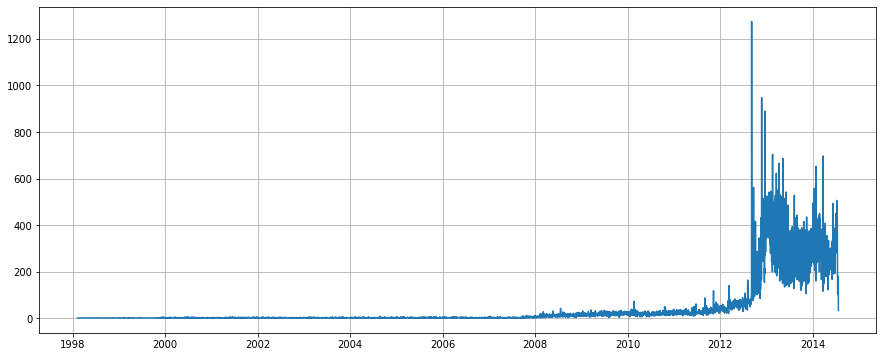

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(ts_pos.index,ts_pos.values)

plt.grid()
plt.show()

In [ ]:
ts_pos=ts_pos[ts_pos.index >= "2008-12-31"]

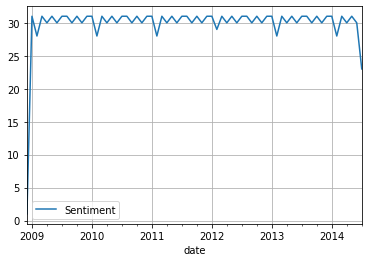

In [ ]:
resample=ts_pos.resample("M")     #monthly
w_mean1=resample.count()
w_mean1.plot()

plt.grid()
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(w_mean1,period=12)

In [ ]:
trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

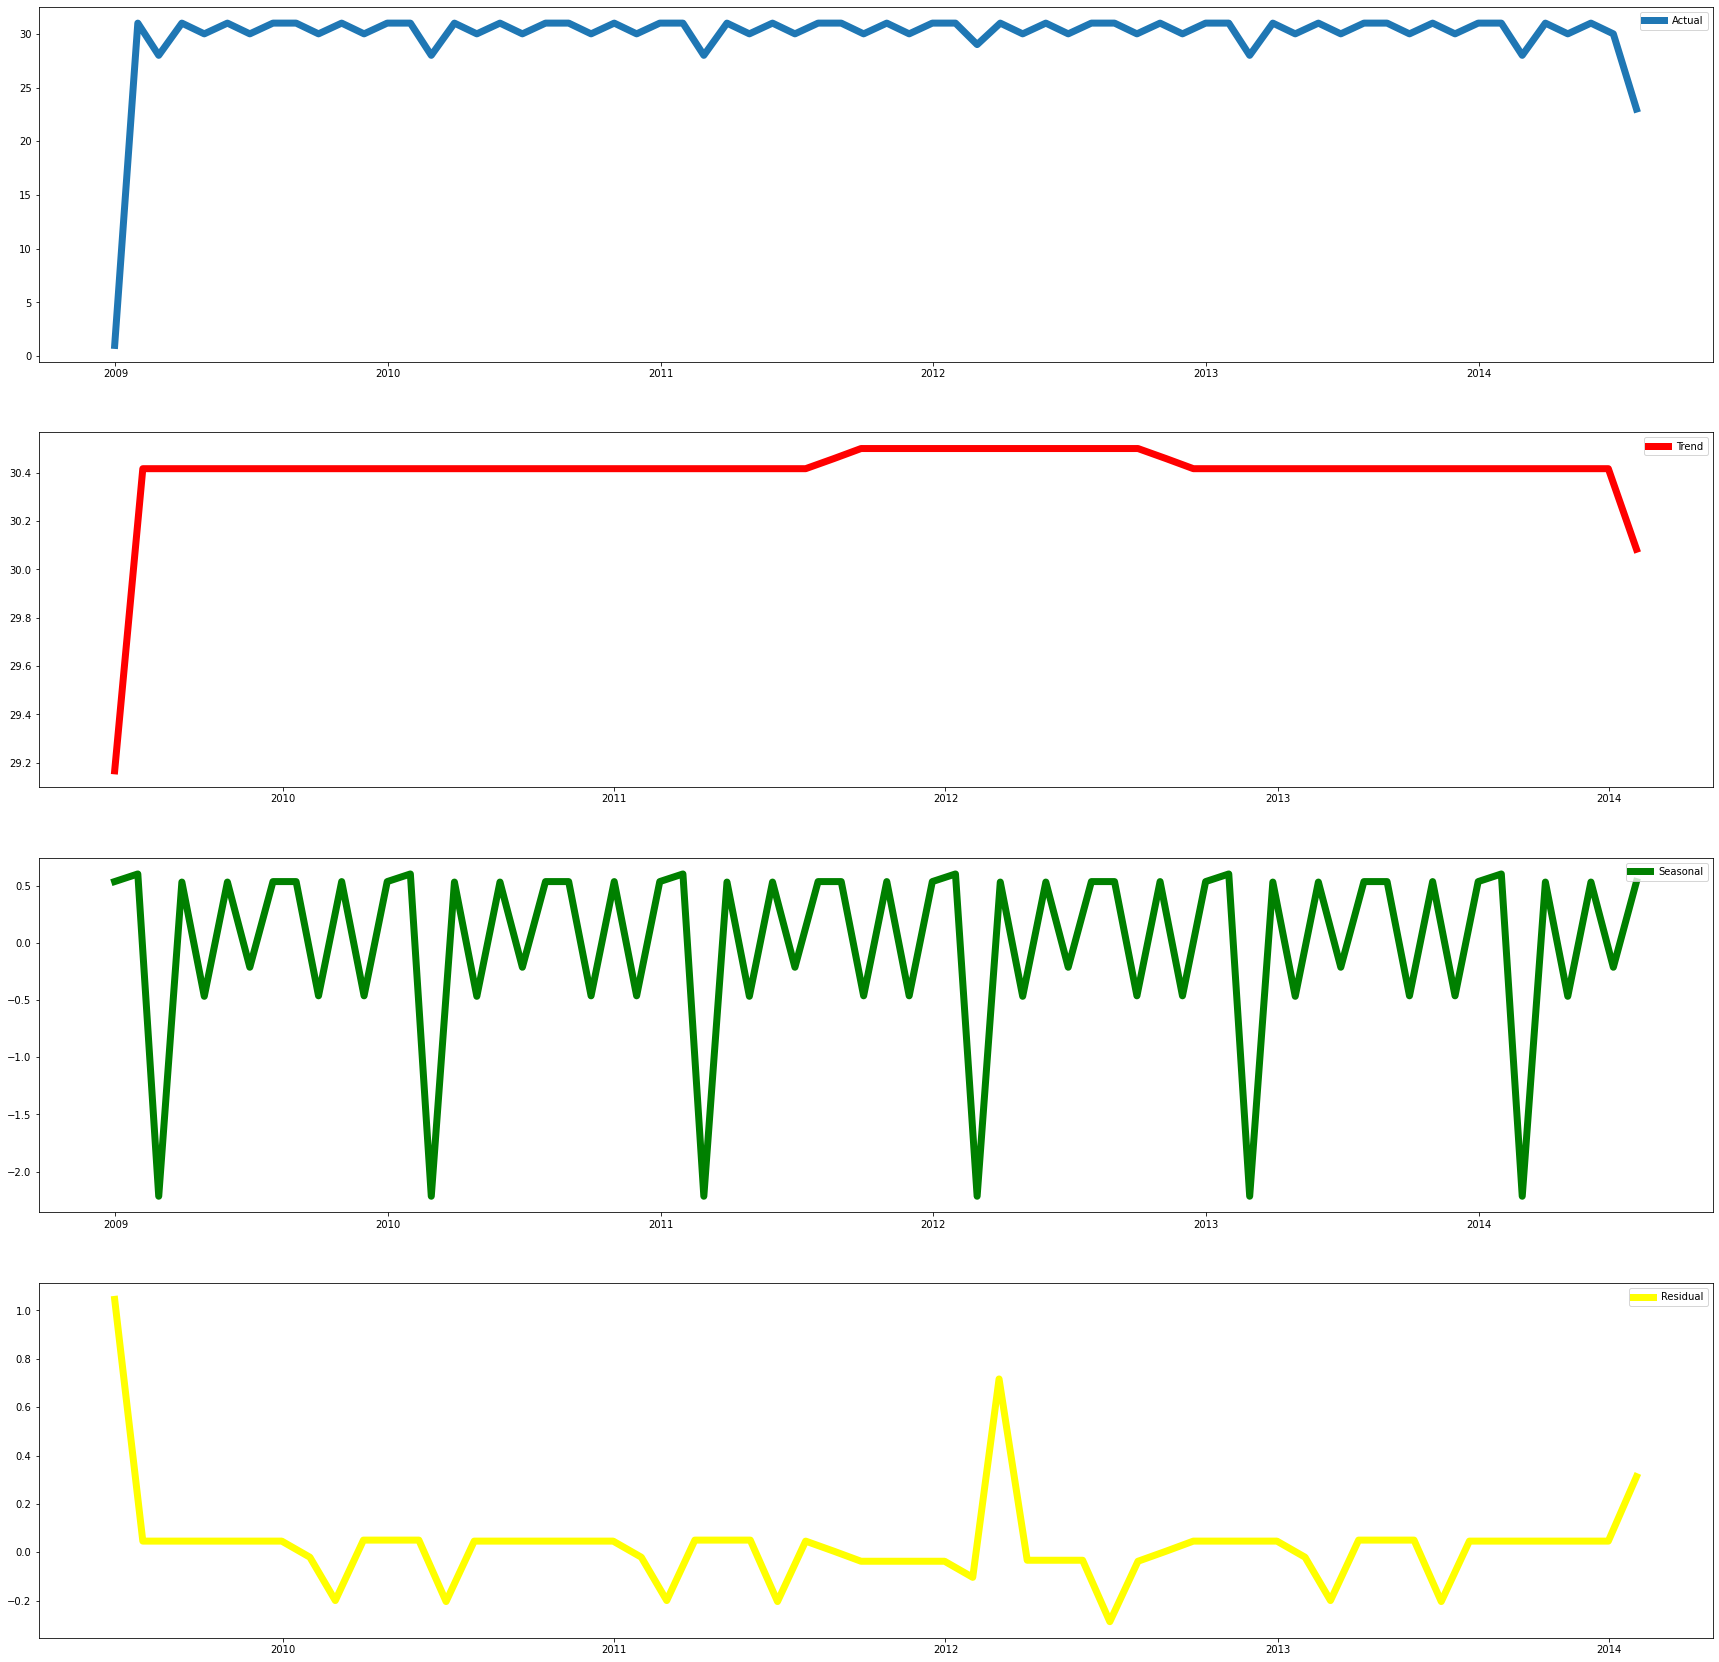

In [ ]:
plt.figure(figsize=(30,30))          # Creating subplots of Actual trends seasonal and residual
plt.subplot(4,1,1)
plt.plot(w_mean1,label = 'Actual',linewidth=7.0)
plt.legend()

plt.subplot(412)
plt.plot(trend,label = "Trend",linewidth=7.0,c="red")
plt.legend()

plt.subplot(413)
plt.plot(seasonal,label = 'Seasonal',linewidth=7.0,c="green")
plt.legend()

plt.subplot(414)
plt.plot(residual,label = 'Residual',linewidth=7.0,c="yellow")
plt.legend()

plt.show()

In [ ]:
## By seeing components of time series , we can conclude that there's a seasonality in every graph and also some trend,so we have used sarima model for forecasting.

In [ ]:
## Spiliting the data date wise for training and testing
train_len=int(0.7*len(w_mean1))
train1=w_mean1.iloc[:train_len]
test1=w_mean1.iloc[train_len:]
len(train1),len(test1)

(47, 21)

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def checkstationarity(data):
    pvalue=adfuller(data)[1]
    if pvalue< 0.05:
        ret='Data is stationary.Do model building'
    else:
        ret='Data is not stationary.Make the data stationary'
    return(ret)

In [ ]:
checkstationarity(w_mean1)

'Data is stationary.Do model building'

In [ ]:
import statsmodels.api as sm

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 1440x360 with 0 Axes>

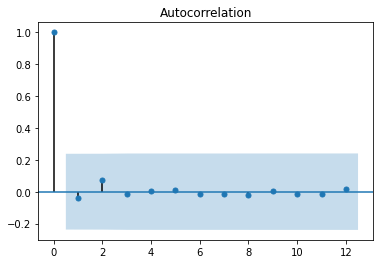

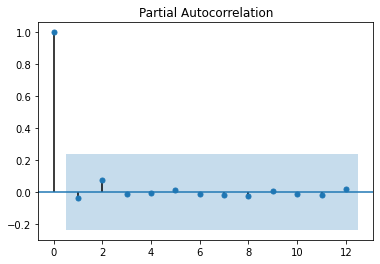

In [ ]:
plt.figure(figsize=(20,5))
plot_acf(w_mean1,lags=12)  ## earlier was 30
plot_pacf(w_mean1,lags=12)
plt.show()

In [ ]:
li=[]
for i in range(2):
    for j in range(2):
        li.append((i,0,j)) # taking d = 0 since it is arma 
li

[(0, 0, 0), (0, 0, 1), (1, 0, 0), (1, 0, 1)]

In [ ]:
modelsm=[]
for i in range(2):
    for j in range(2): 
        m = sm.tsa.statespace.SARIMAX(train1,order=(i,0,j) ,seasonal_order=(i,0,j,12)).fit()
        modelsm.append(m)
modelsm

In [ ]:
from sklearn.metrics import mean_squared_error
MSE=[]
RMSE=[]
AIC=[]
BIC=[]
for i in modelsm:
    forecast=i.fittedvalues
    mse=mean_squared_error(train1,forecast)
    rmse=mean_squared_error(train1,forecast,squared=False)
    aic1= i.aic
    bic1= i.bic
    MSE.append(mse)
    RMSE.append(rmse)
    AIC.append(aic1)
    BIC.append(bic1)

In [ ]:
d1=pd.DataFrame({"MSE":MSE,"RMSE":RMSE,"AIC":AIC,"BIC":BIC},index=li)
d1.sort_values(by=["AIC"],ascending=True)

,MSE,RMSE,AIC,BIC
"(1, 0, 0)",21.778700,4.666765,285.749808,291.300251
"(1, 0, 1)",24.161566,4.915442,286.751749,296.002487
"(0, 0, 1)",151.737259,12.318168,370.468047,376.018489
"(0, 0, 0)",907.255319,30.120679,455.470146,457.320293


In [ ]:
p=1; d=0; q=0
m1 = sm.tsa.statespace.SARIMAX(train1,order=(p,d,q),seasonal_order=(p,d,q,12)).fit()

In [ ]:
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Sentiment   No. Observations:                   47
Model:             SARIMAX(1, 0, 0)x(1, 0, 0, 12)   Log Likelihood                -139.875
Date:                            Tue, 13 Dec 2022   AIC                            285.750
Time:                                    10:53:31   BIC                            291.300
Sample:                                12-31-2008   HQIC                           287.838
                                     - 10-31-2012                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9760      0.041     23.699      0.000       0.895       1.057
ar.S.L12       0.2460      0.110      2.239      0.025       0.031       0.461
sigma2        20.5882      1.477     13.937      0.000      17.693      23.484
===================================================================================
Ljung-Box (L1) (Q):                   1.04   Jarque-Bera (JB):              2226.90
Prob(Q):                              0.31   Prob(JB):                         0.00
Heteroskedasticity (H):               0.02   Skew:                             5.34
Prob(H) (two-sided):                  0.00   Kurtosis:                        34.99
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

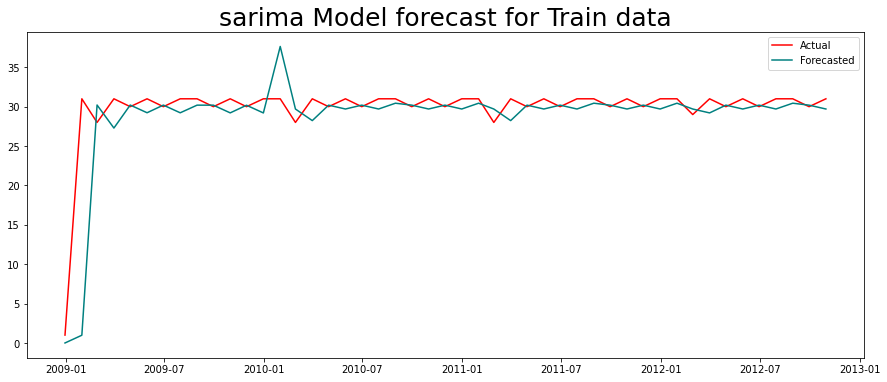

In [ ]:
sarima_fcast1 = m1.fittedvalues # for past values prediction
plt.figure(figsize=(15,6))
plt.title('sarima Model forecast for Train data',fontsize=25)
plt.plot(train1, color = 'red' , label = 'Actual')
plt.plot(sarima_fcast1, color = 'teal' , label = 'Forecasted')
plt.legend()
plt.show()

In [ ]:
forecast1=m1.forecast(len(test1)) 
len(forecast1)

21

In [ ]:
forecast1

2012-11-30    30.193872
2012-12-31    29.893213
2013-01-31    29.359631
2013-02-28    28.346787
2013-03-31    28.330519
2013-04-30    27.588361
2013-05-31    27.350139
2013-06-30    26.631474
2013-07-31    26.416183
2013-08-31    25.965922
2013-09-30    25.280428
2013-10-31    25.097512
2013-11-30    24.480525
2013-12-31    23.997928
2014-01-31    23.467818
2014-02-28    22.829356
2014-03-31    22.445404
2014-04-30    21.891971
2014-05-31    21.471404
2014-06-30    20.941311
2014-07-31    20.543526
Freq: M, Name: predicted_mean, dtype: float64

In [ ]:
test1

,Sentiment
date,
2012-11-30,30
2012-12-31,31
2013-01-31,31
2013-02-28,28
2013-03-31,31
2013-04-30,30
2013-05-31,31
2013-06-30,30
2013-07-31,31


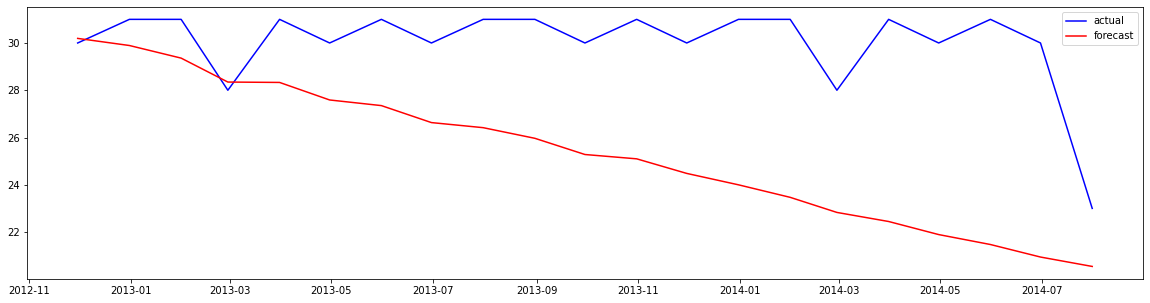

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(test1,label='actual',c= 'blue')
plt.plot(forecast1,label='forecast',c= 'red')
#plt.title('sarima Model forecast for test data',fontsize=25)
plt.legend()
plt.show()

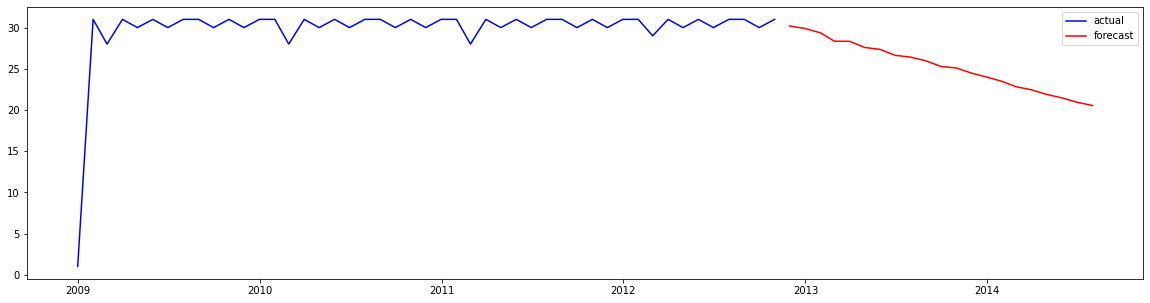

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(train1,label='actual',c= 'blue')
plt.plot(forecast1,label='forecast',c= 'red')
#plt.title('Sarima Model Future Forecast For Positive Reviews  ',fontsize=25)
plt.legend()
plt.show()

In [ ]:
### 2).NEGATIVE sentiments:-

ts_neg.head()

,Sentiment
date,
1998-05-01,1
1998-06-23,1
1998-09-07,1
1998-11-14,1
1999-01-28,1


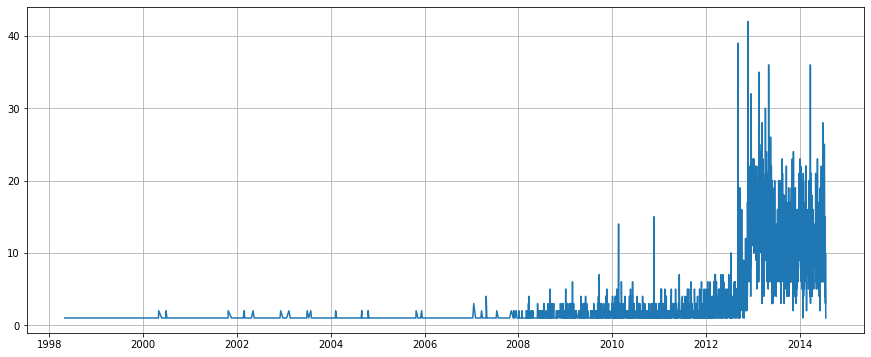

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(ts_neg.index,ts_neg.values)
plt.grid()
plt.show()

In [ ]:
ts_neg1=ts_neg[ts_neg.index >= "2011-06-06"] 

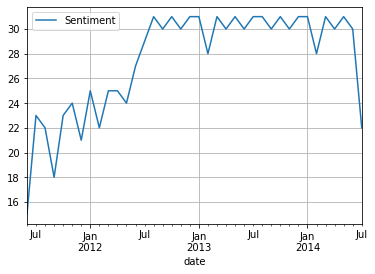

In [ ]:
resample=ts_neg1.resample("M")     #monthly
w_mean2=resample.count()
w_mean2.plot()
plt.grid()
plt.show()

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomp=seasonal_decompose(w_mean2,period=12)

In [ ]:
trend=decomp.trend
seasonal=decomp.seasonal
residual=decomp.resid

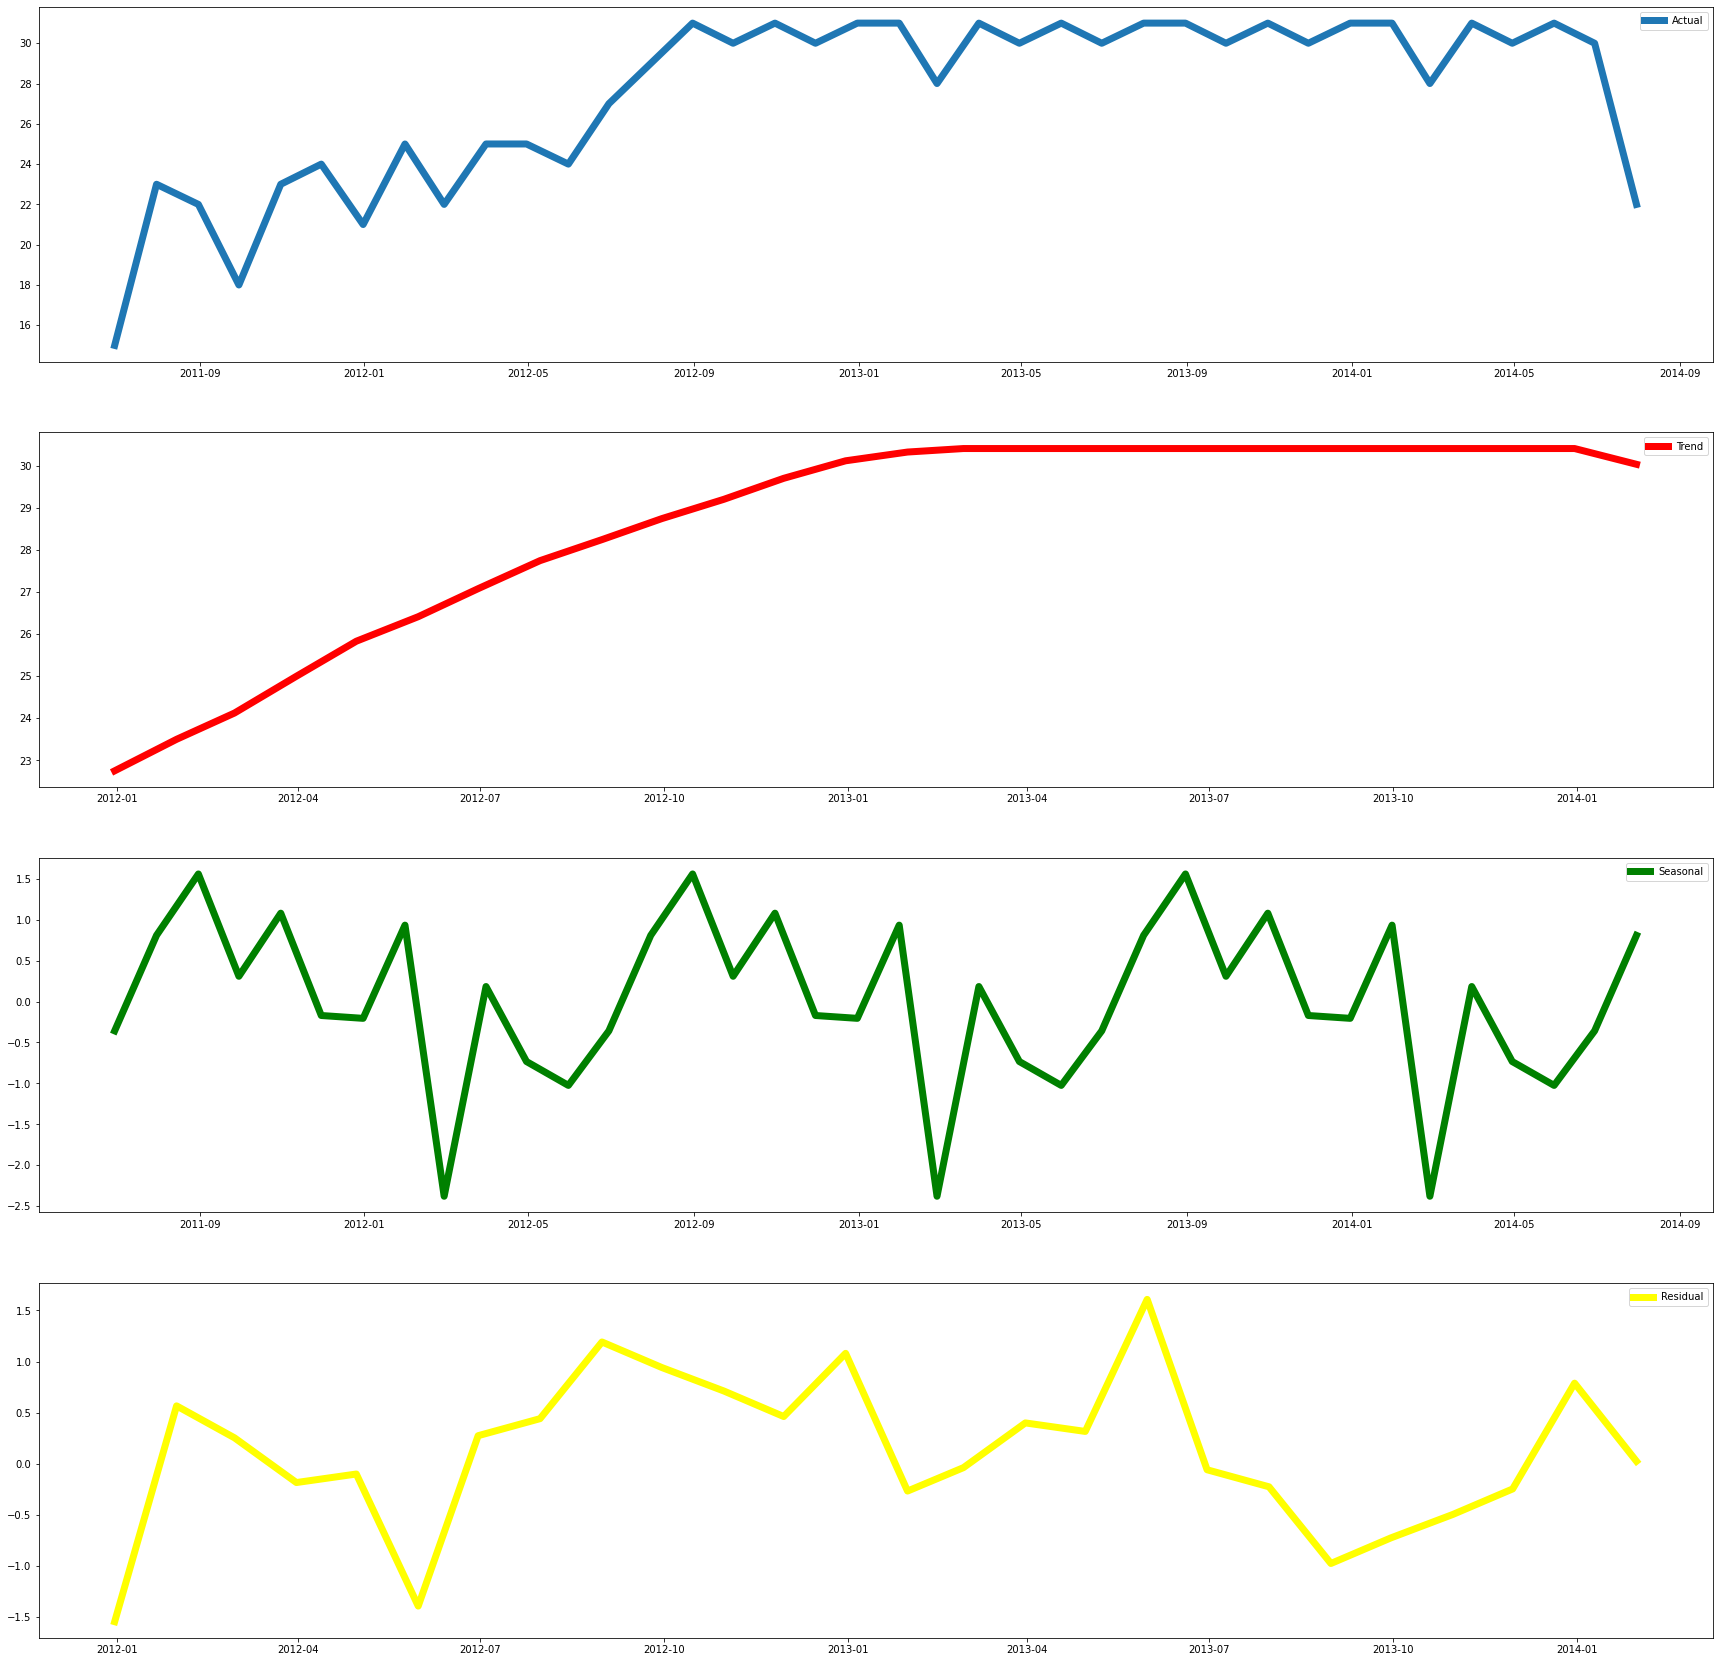

In [ ]:
plt.figure(figsize=(30,30))          # Creating subplots of Actual trends seasonal and residual
plt.subplot(4,1,1)
plt.plot(w_mean2,label = 'Actual',linewidth=7.0)
plt.legend()

plt.subplot(412)
plt.plot(trend,label = "Trend",linewidth=7.0,c="red")
plt.legend()

plt.subplot(413)
plt.plot(seasonal,label = 'Seasonal',linewidth=7.0,c="green")
plt.legend()

plt.subplot(414)
plt.plot(residual,label = 'Residual',linewidth=7.0,c="yellow")
plt.legend()

plt.show()

In [ ]:
## Spiliting the data date wise for training and testing
train_len=int(0.7*len(w_mean2))
train2=w_mean2.iloc[:train_len]
test2=w_mean2.iloc[train_len:]
len(train2),len(test2)

(26, 12)

In [ ]:
from statsmodels.tsa.stattools import adfuller

In [ ]:
def checkstationarity(data):
    pvalue=adfuller(data)[1]
    if pvalue< 0.05:
        ret='Data is stationary.Do model building'
    else:
        ret='Data is not stationary.Make the data stationary'
    return(ret)

In [ ]:
checkstationarity(w_mean2)

'Data is stationary.Do model building'

<Figure size 1440x360 with 0 Axes>

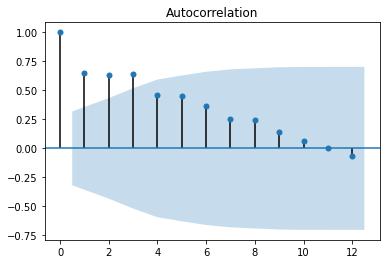

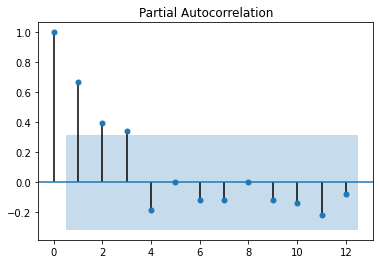

In [ ]:
plt.figure(figsize=(20,5))
plot_acf(w_mean2,lags=12)  ## earlier was 30
plot_pacf(w_mean2,lags=12)
plt.show()

In [ ]:
#P=3,Q=3

In [ ]:
li=[]
for i in range(3):
    for j in range(3):
        li.append((i,0,j)) # taking d = 0 since it is arma 
li

[(0, 0, 0),
 (0, 0, 1),
 (0, 0, 2),
 (1, 0, 0),
 (1, 0, 1),
 (1, 0, 2),
 (2, 0, 0),
 (2, 0, 1),
 (2, 0, 2)]

In [ ]:
modelsm=[]
for i in range(3):
    for j in range(3): 
        m = sm.tsa.statespace.SARIMAX(train2,order=(i,0,j) ,seasonal_order=(i,0,j,12)).fit()
        modelsm.append(m)
modelsm

In [ ]:
from sklearn.metrics import mean_squared_error
MSE=[]
RMSE=[]
AIC=[]
BIC=[]
for i in modelsm:
    forecast=i.fittedvalues
    mse=mean_squared_error(train2,forecast)
    rmse=mean_squared_error(train2,forecast,squared=False)
    aic1= i.aic
    bic1= i.bic
    MSE.append(mse)
    RMSE.append(rmse)
    AIC.append(aic1)
    BIC.append(bic1)

In [ ]:
d1=pd.DataFrame({"MSE":MSE,"RMSE":RMSE,"AIC":AIC,"BIC":BIC},index=li)
d1.sort_values(by=["AIC"],ascending=True)

,MSE,RMSE,AIC,BIC
"(1, 0, 2)",14.711207,3.835519,132.680058,141.486733
"(1, 0, 1)",15.057865,3.880446,133.949129,140.239612
"(2, 0, 0)",15.346677,3.917483,134.973321,141.263803
"(1, 0, 0)",16.118371,4.014769,135.393539,139.167828
"(2, 0, 2)",14.970703,3.869199,140.968998,152.291867
"(2, 0, 1)",16.095414,4.011909,143.128065,151.934741
"(0, 0, 2)",60.140213,7.755012,184.907256,191.197738
"(0, 0, 1)",127.770371,11.303556,204.865040,208.639329
"(0, 0, 0)",720.153846,26.835682,246.850890,248.108987


In [ ]:
p=1; d=0; q=2
m2 = sm.tsa.statespace.SARIMAX(train2,order=(p,d,q),seasonal_order=(p,d,q,12)).fit()

In [ ]:
m2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                          Sentiment   No. Observations:                   26
Model:             SARIMAX(1, 0, 2)x(1, 0, 2, 12)   Log Likelihood                 -59.340
Date:                            Tue, 13 Dec 2022   AIC                            132.680
Time:                                    10:53:37   BIC                            141.487
Sample:                                06-30-2011   HQIC                           135.216
                                     - 07-31-2013                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9954      0.049     20.245      0.000       0.899       1.092
ma.L1         -0.8861      0.184     -4.820      0.000      -1.246      -0.526
ma.L2          0.6622      0.232      2.857      0.004       0.208       1.117
ar.S.L12      -0.6869    139.966     -0.005      0.996    -275.015     273.641
ma.S.L12       1.2156    346.417      0.004      0.997    -677.749     680.180
ma.S.L24       0.7613    276.022      0.003      0.998    -540.232     541.755
sigma2         2.9759    788.071      0.004      0.997   -1541.615    1547.567
===================================================================================
Ljung-Box (L1) (Q):                   0.90   Jarque-Bera (JB):                 0.23
Prob(Q):                              0.34   Prob(JB):                         0.89
Heteroskedasticity (H):               0.28   Skew:                             0.17
Prob(H) (two-sided):                  0.07   Kurtosis:                         2.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

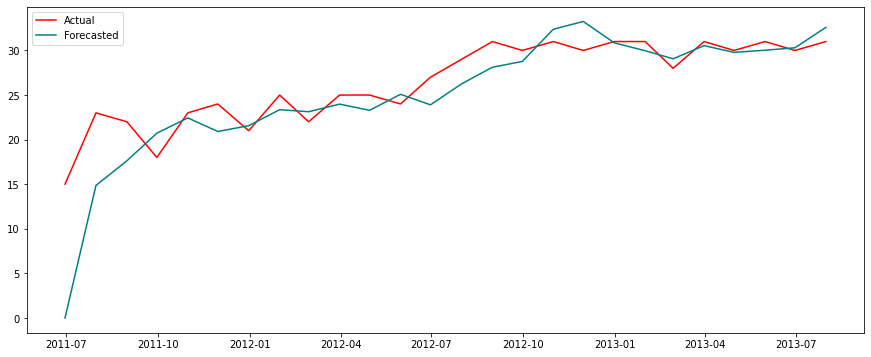

In [ ]:
sarima_fcast2 = m2.fittedvalues # for past values prediction
plt.figure(figsize=(15,6))
#plt.title('sarima Model forecast for Train data',fontsize=25)
plt.plot(train2, color = 'red' , label = 'Actual')
plt.plot(sarima_fcast2, color = 'teal' , label = 'Forecasted')
plt.legend()
plt.show()


In [ ]:
forecast2=m2.forecast(len(test2)) 
len(forecast2)

12

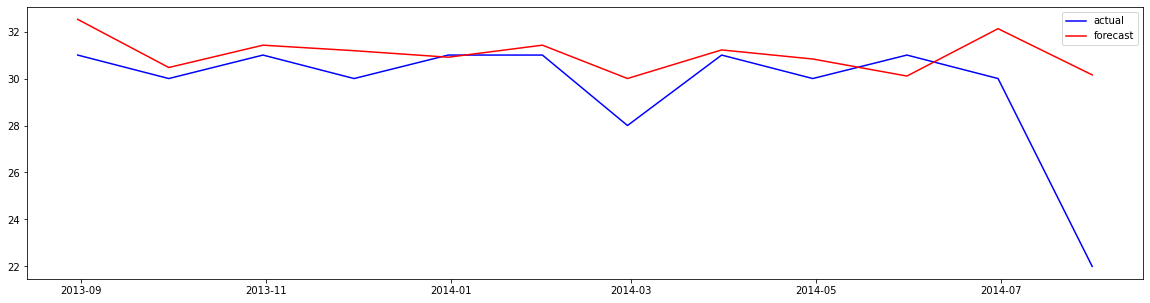

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(test2,label='actual',c= 'blue')
plt.plot(forecast2,label='forecast',c= 'red')
#plt.title('sarima Model forecast for test data',fontsize=25)
plt.legend()
plt.show()

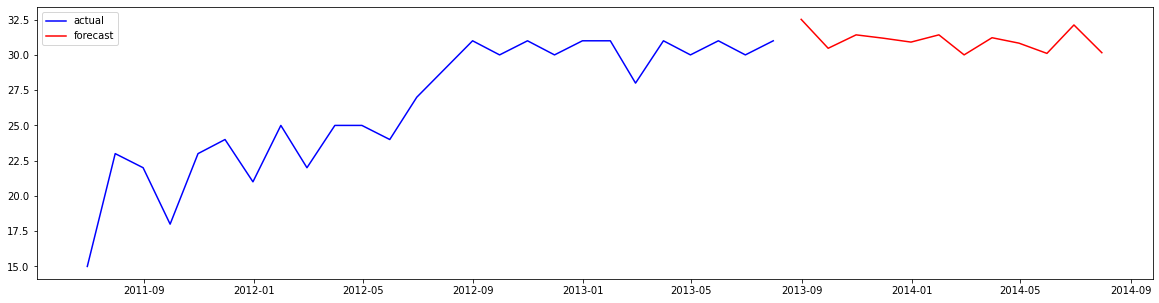

In [ ]:
plt.figure(figsize=(20,5))
plt.plot(train2,label='actual',c= 'blue')
plt.plot(forecast2,label='forecast',c= 'red')
#plt.title('sarima Model future forecast',fontsize=25)
plt.legend()
plt.show()